In [1]:
from process import ImagePrec
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

##### Initializing a object instance

In [2]:
label_file = '../data/base/Annotations/label.csv'
img_path = '../data/base'
category = "collar_design_labels"
ip = ImagePrec(category=category, label_file=label_file, img_path=img_path, 
               pad_square=True, size=128)

Time usage for loading the images is 221.356537819 sec.


##### Random show images

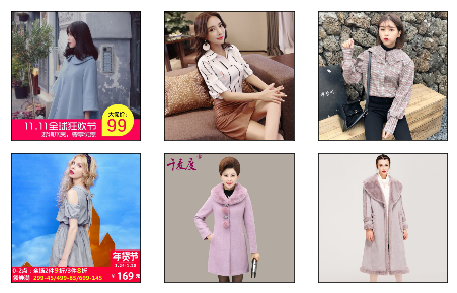

In [3]:
n = len(ip._imgs)
idx = np.array([np.random.randint(n) for i in range(6)])
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
for i, ax in zip(idx, axes.flat):
    ax.imshow(ip._imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [4]:
idx = np.array([np.random.randint(n)])
batch = ip.getbatch(idx=idx, reflect=True, random_crop=4, crop_resize=True)

Time usage for generating batch is 0.029002904892 sec.


##### Check the Batch generator

In [5]:
x, y = batch
print np.array(x).shape, np.array(y).shape

(6, 128, 128, 3) (6, 5)


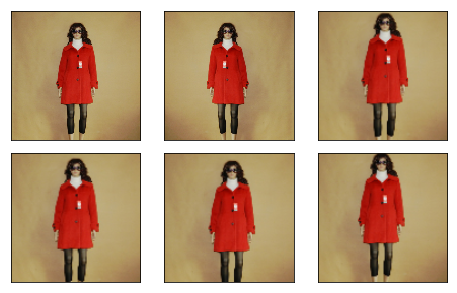

In [6]:
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(x[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [7]:
# Keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, Reshape
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.utils import np_utils, plot_model
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.callbacks import LearningRateScheduler
from keras import regularizers
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.


##### Trying resnet 50

In [8]:
model_resnet = ResNet50(weights='imagenet', include_top=False)
model_resnet.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, None, None, 64 9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, None, None, 64 256                                          
___________________________________________________________________________________________

bn5a_branch1 (BatchNormalization (None, None, None, 20 8192                                         
____________________________________________________________________________________________________
add_14 (Add)                     (None, None, None, 20 0                                            
____________________________________________________________________________________________________
activation_43 (Activation)       (None, None, None, 20 0                                            
____________________________________________________________________________________________________
res5b_branch2a (Conv2D)          (None, None, None, 51 1049088                                      
____________________________________________________________________________________________________
bn5b_branch2a (BatchNormalizatio (None, None, None, 51 2048                                         
___________________________________________________________________________________________

##### Trying non resized input images